In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'

In [3]:
ROOT = "'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'"

In [4]:
os.listdir()

['.git', '.ipynb_checkpoints', 'car1.jpeg', 'CNN.ipynb']

In [5]:
img_path = 'car1.jpeg'

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [7]:
car1 = mpimg.imread(img_path)

In [8]:
car1.shape

(168, 300, 3)

In [9]:
type(car1)

numpy.ndarray

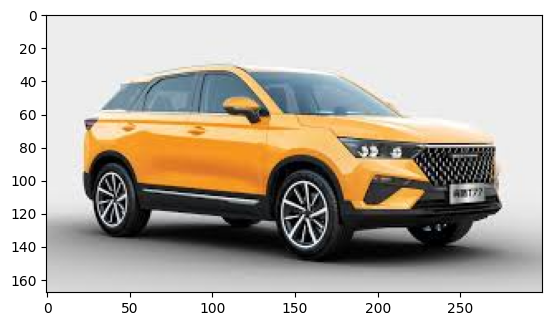

In [10]:
plt.imshow(car1)

In [11]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [12]:
car1_cv2 = cv2.imread(img_path)

In [13]:
#cv2.imshow("image", car1_cv2)

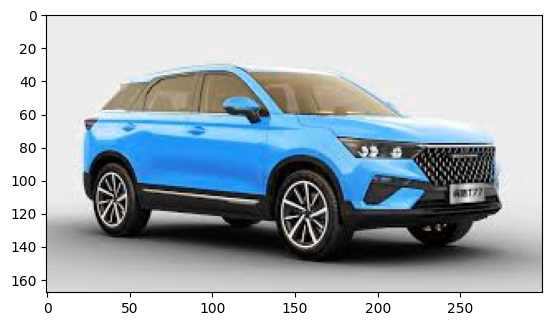

In [14]:
plt.imshow(car1_cv2)

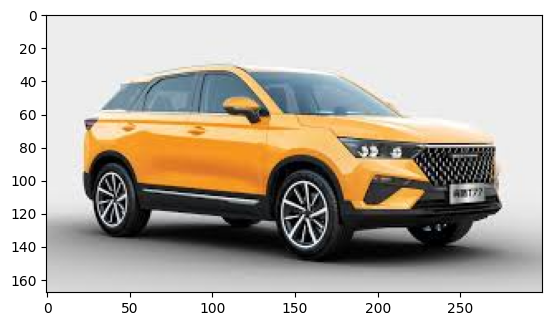

In [15]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

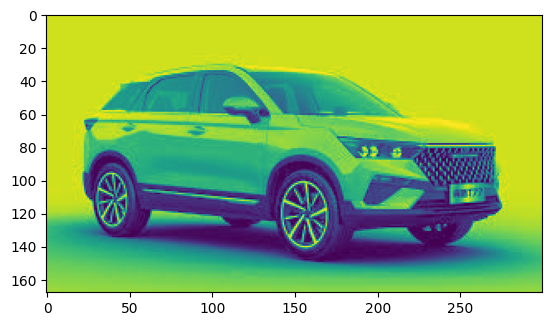

In [16]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap='gr')